In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Task1. Data set 설명
- 조현병 여부를 진단하는 data set (classification)
- kaggle

In [8]:
df = pd.read_csv(r"C:\Users\kihun\Desktop\python_workspace\EPOCH\mini_project\schizophrenia_dataset.csv")

In [9]:
df.shape

(10000, 20)

In [10]:
df.head()

,Hasta_ID,Yaş,Cinsiyet,Eğitim_Seviyesi,Medeni_Durum,Meslek,Gelir_Düzeyi,Yaşadığı_Yer,Tanı,Hastalık_Süresi,Hastaneye_Yatış_Sayısı,Ailede_Şizofreni_Öyküsü,Madde_Kullanımı,İntihar_Girişimi,Pozitif_Semptom_Skoru,Negatif_Semptom_Skoru,GAF_Skoru,Sosyal_Destek,Stres_Faktörleri,İlaç_Uyumu
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


In [11]:
#보기 쉽게 column명 변경
new_columns = ['ID', 'Age', 'Gender', 'Education', 'Martial_status', 'occupation', 'Income', 'Living_area', 'Diagnois', 'Disease_duartion', 'Hospitalizations', 'Family_history', 'Substance_use', 'Suicide_attempt', 'Positive_symptom_score', 'Negative_symptom_score', 'GAF_score', 'Social_support', 'Stress_factors', 'medication_adherence']
len(new_columns)
df.columns = new_columns
df.head()

,ID,Age,Gender,Education,Martial_status,occupation,Income,Living_area,Diagnois,Disease_duartion,Hospitalizations,Family_history,Substance_use,Suicide_attempt,Positive_symptom_score,Negative_symptom_score,GAF_score,Social_support,Stress_factors,medication_adherence
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ID                      10000 non-null  int64
 1   Age                     10000 non-null  int64
 2   Gender                  10000 non-null  int64
 3   Education               10000 non-null  int64
 4   Martial_status          10000 non-null  int64
 5   occupation              10000 non-null  int64
 6   Income                  10000 non-null  int64
 7   Living_area             10000 non-null  int64
 8   Diagnois                10000 non-null  int64
 9   Disease_duartion        10000 non-null  int64
 10  Hospitalizations        10000 non-null  int64
 11  Family_history          10000 non-null  int64
 12  Substance_use           10000 non-null  int64
 13  Suicide_attempt         10000 non-null  int64
 14  Positive_symptom_score  10000 non-null  int64
 15  Negative_symptom_sco

- age, , duration, score 변수들을 제외하곤 모두 범주형 자료로 처리해주는게 좋을듯

In [14]:
# 순서형 전환
from pandas.api.types import CategoricalDtype

cat_dtype_col1 = CategoricalDtype(categories=list(range(1, 6)), ordered=True)  # 1에서 5까지 (edu)
cat_dtype_col2 = CategoricalDtype(categories=list(range(0, 3)), ordered=True)  # 0에서 2까지 (income, social_support, stress_factors, medication_adherence)

df['Education'] = df['Education'].astype(cat_dtype_col1)
df['Income'] = df['Income'].astype(cat_dtype_col2)
df['Social_support'] = df['Social_support'].astype(cat_dtype_col2)
df['Stress_factors'] = df['Stress_factors'].astype(cat_dtype_col2)
df['medication_adherence'] = df['medication_adherence'].astype(cat_dtype_col2)

# 범주형 전환
df['Gender'] = df['Gender'].astype('category')
df['Martial_status'] = df['Martial_status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['Living_area'] = df['Living_area'].astype('category')
df['Diagnois'] = df['Diagnois'].astype('category')
df['Family_history'] = df['Family_history'].astype('category')
df['Substance_use'] = df['Substance_use'].astype('category')
df['Suicide_attempt'] = df['Suicide_attempt'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      10000 non-null  int64   
 1   Age                     10000 non-null  int64   
 2   Gender                  10000 non-null  category
 3   Education               10000 non-null  category
 4   Martial_status          10000 non-null  category
 5   occupation              10000 non-null  category
 6   Income                  10000 non-null  category
 7   Living_area             10000 non-null  category
 8   Diagnois                10000 non-null  category
 9   Disease_duartion        10000 non-null  int64   
 10  Hospitalizations        10000 non-null  int64   
 11  Family_history          10000 non-null  category
 12  Substance_use           10000 non-null  category
 13  Suicide_attempt         10000 non-null  category
 14  Positive_symptom_score 

# Task2. 기초통계확인

In [16]:
# 수치형 변수
num_cols = [col for col in df.columns[:] if df[col].dtype in ['int64', 'float64']]
df[num_cols].describe()

,ID,Age,Disease_duartion,Hospitalizations,Positive_symptom_score,Negative_symptom_score,GAF_score
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,5000.50000,48.867700,5.859000,1.440300,39.019000,39.4614,67.031800
std,2886.89568,18.215054,11.066814,2.824152,27.276962,27.0175,23.999833
min,1.00000,18.000000,0.000000,0.000000,0.000000,0.0000,10.000000
25%,2500.75000,33.000000,0.000000,0.000000,17.000000,18.0000,54.000000
50%,5000.50000,49.000000,0.000000,0.000000,35.000000,35.0000,72.000000
75%,7500.25000,65.000000,5.250000,1.000000,57.000000,57.0000,86.000000
max,10000.00000,80.000000,40.000000,10.000000,100.000000,100.0000,100.000000


In [17]:
#범주형 변수?
cat_cols = [col for col in df.columns[:] if df[col].dtype == 'category']
df[cat_cols].describe()

,Gender,Education,Martial_status,occupation,Income,Living_area,Diagnois,Family_history,Substance_use,Suicide_attempt,Social_support,Stress_factors,medication_adherence
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,5,4,4,3,2,2,2,2,2,3,3,3
top,1,5,3,1,0,0,0,0,0,0,1,0,2
freq,5026,2143,2569,2566,3357,5006,7113,6804,7823,9116,3381,3345,4155


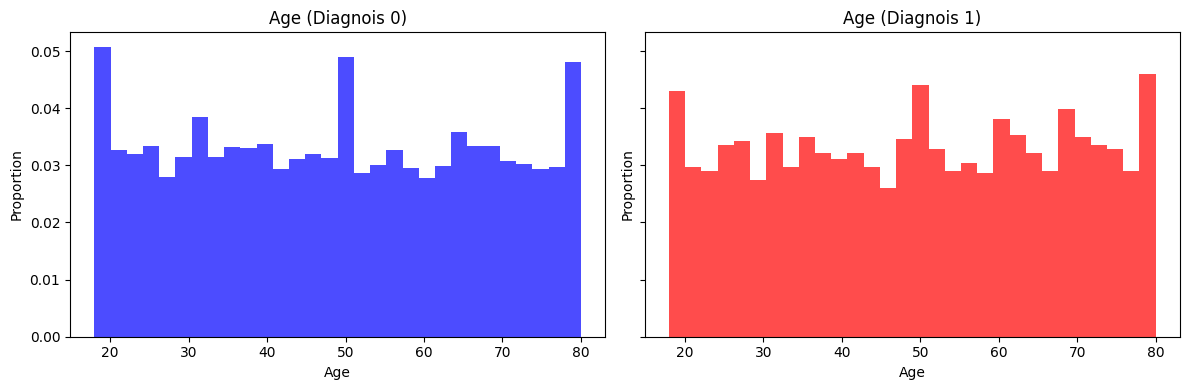

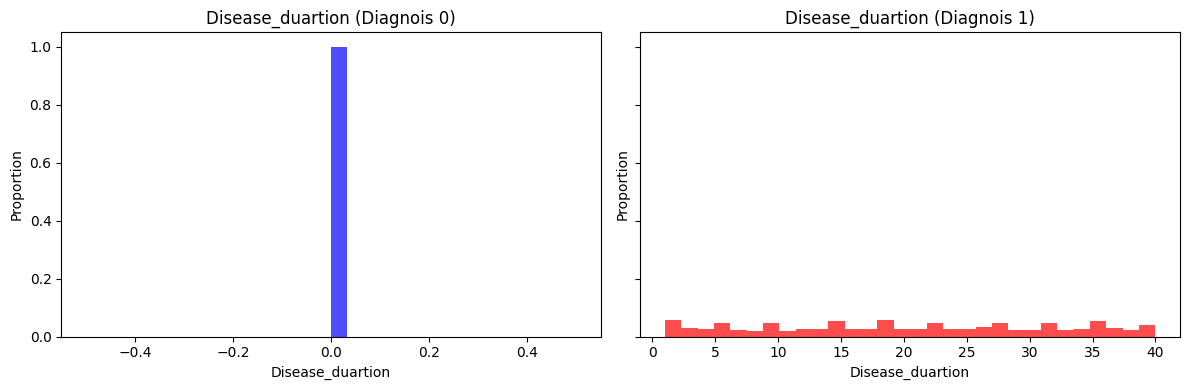

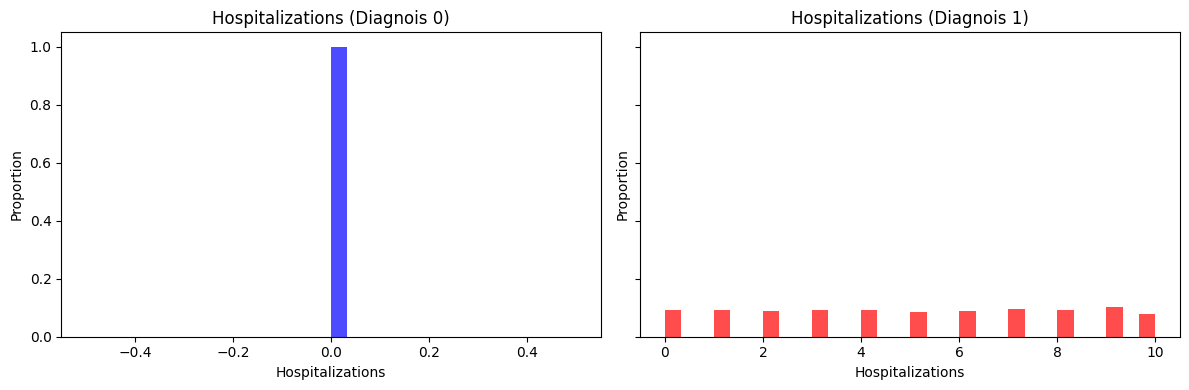

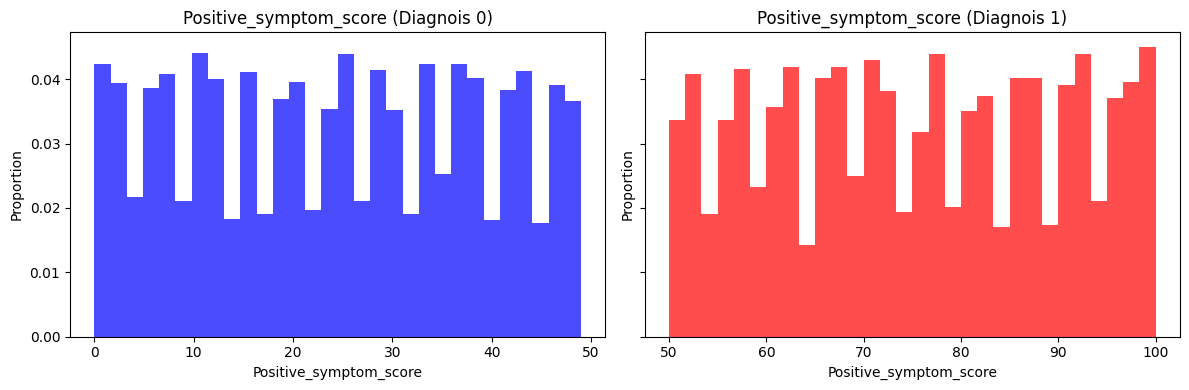

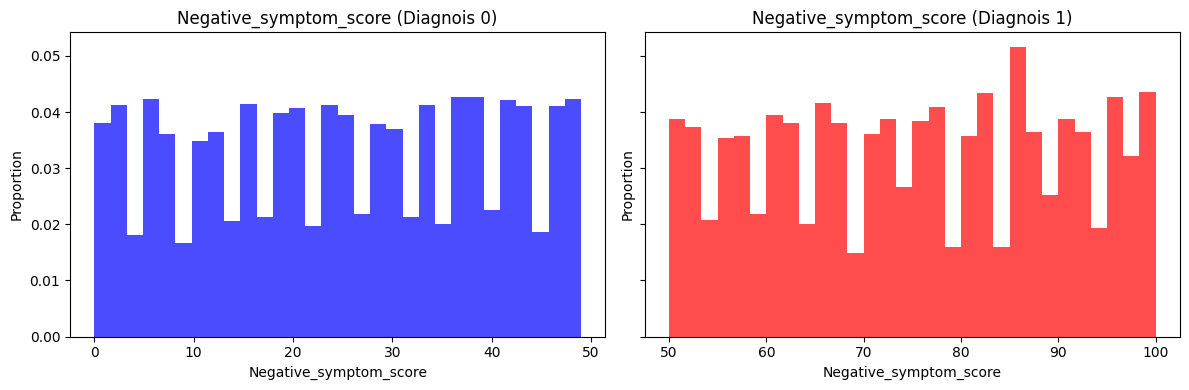

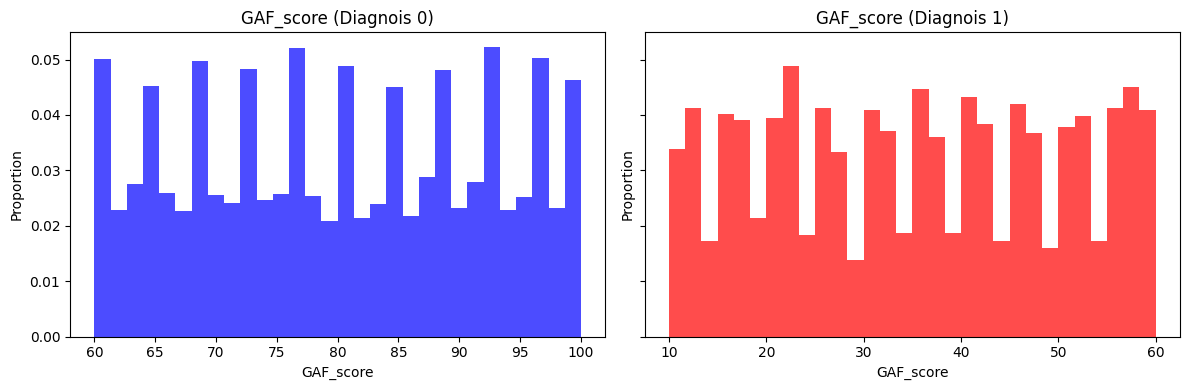

In [25]:
# 시각화
%matplotlib inline

for col in num_cols:
    if col == 'ID':
        continue
        
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    
    for i, diag in enumerate([0, 1]):
        # 각 그룹에 해당하는 데이터 추출
        data = df[df['Diagnois'] == diag][col]
        
        # 전체 데이터 개수를 기준으로 가중치 계산
        # 즉, 각 데이터가 전체 데이터에서 차지하는 비율을 weight로 부여합니다.
        weights = np.ones_like(data) / len(data)
        
        # 히스토그램 그리기
        axes[i].hist(data, bins=30, weights=weights, alpha=0.7,
                     color='blue' if diag == 0 else 'red')
        axes[i].set_title(f'{col} (Diagnois {diag})')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Proportion')
    
    plt.tight_layout()
    plt.show()

- disease_duration, hospitalizations -> 환자 그룹에게만 해당하니 삭제
- score 변수들이 유의미하게 차이남 (아예 겹치는 부분 x)

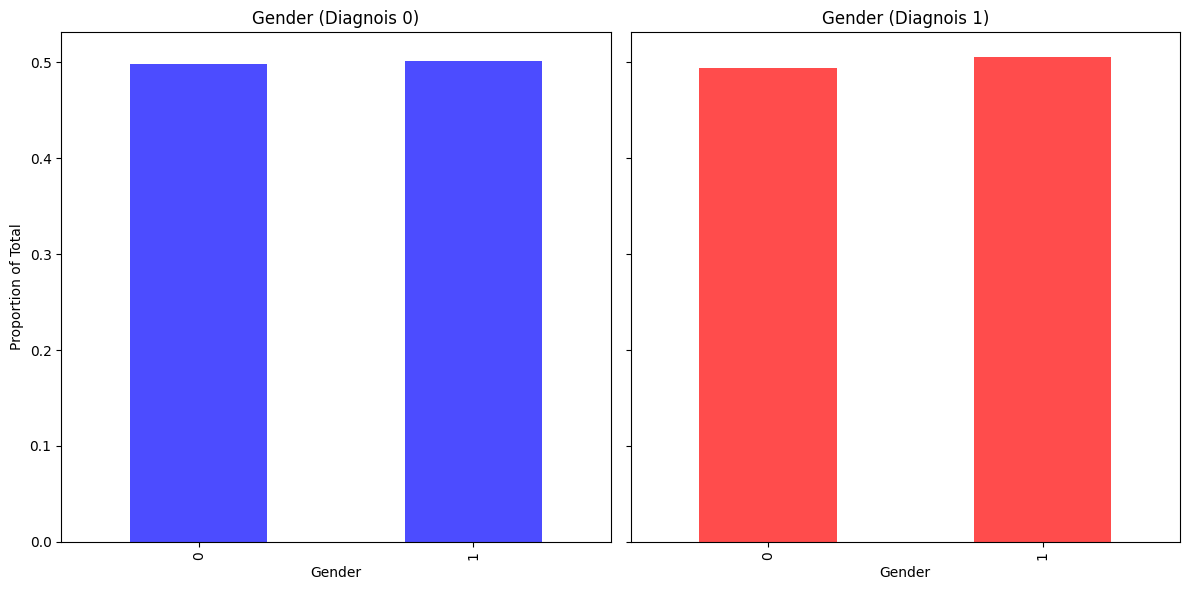

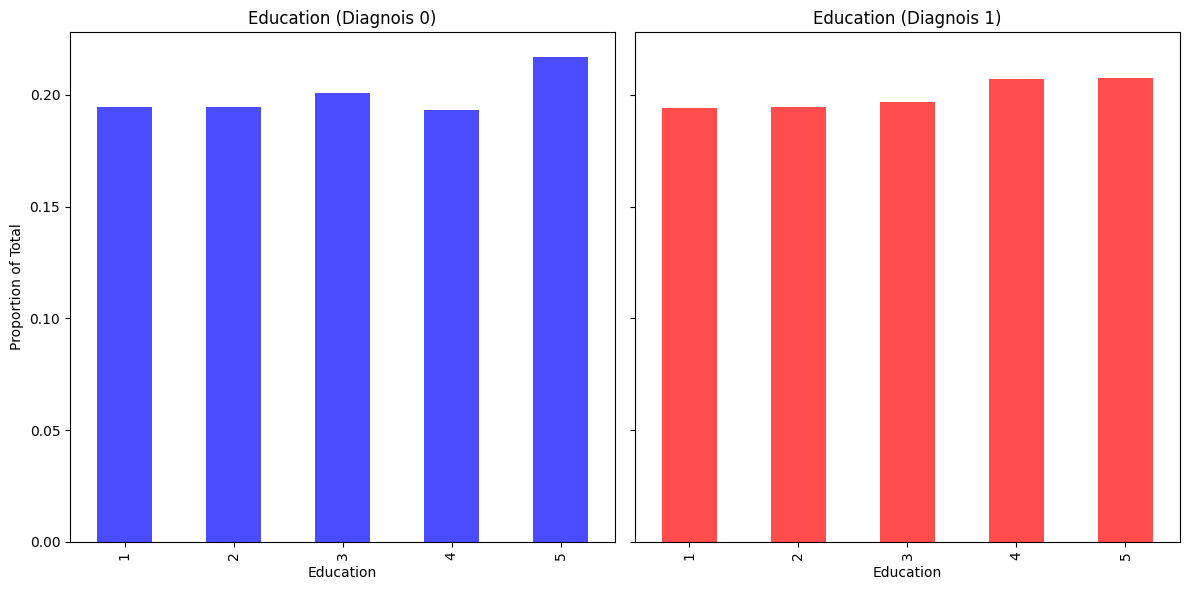

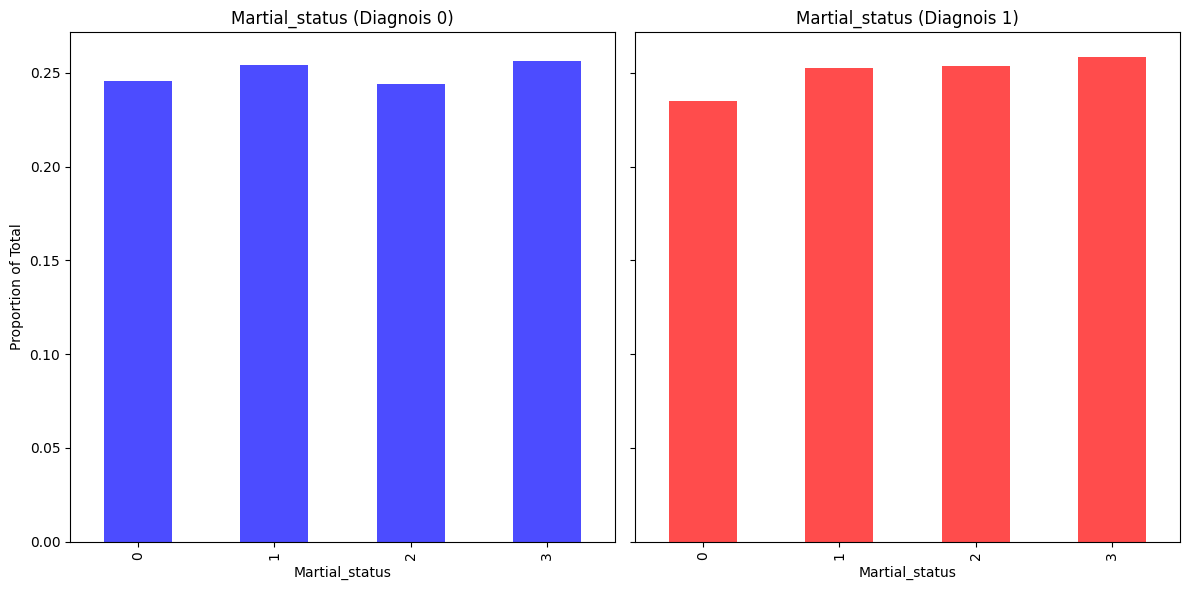

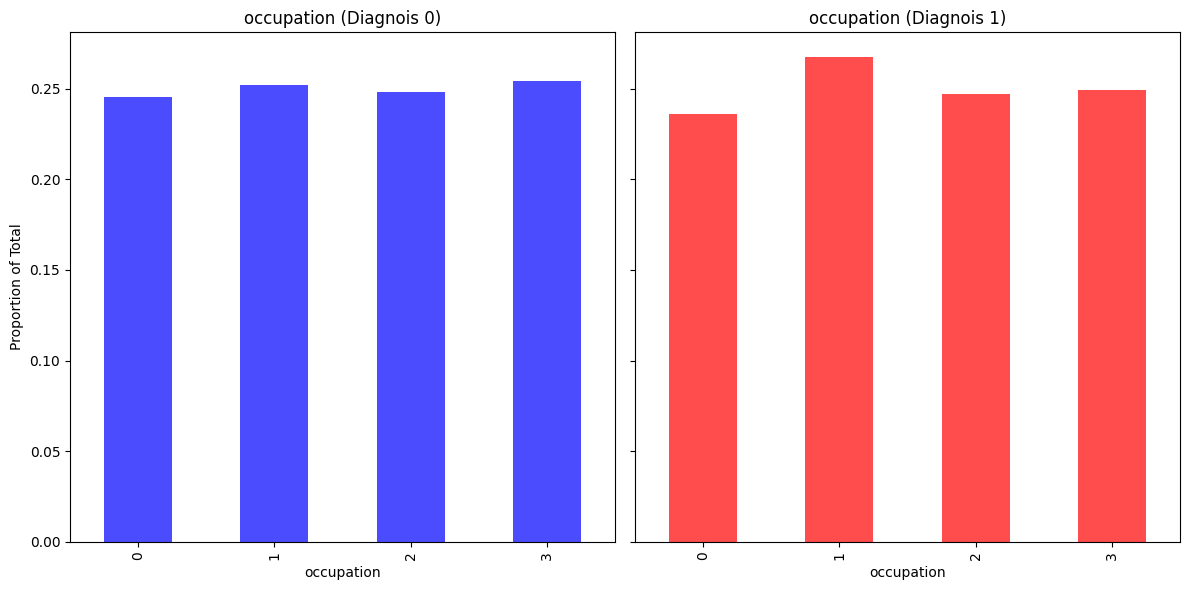

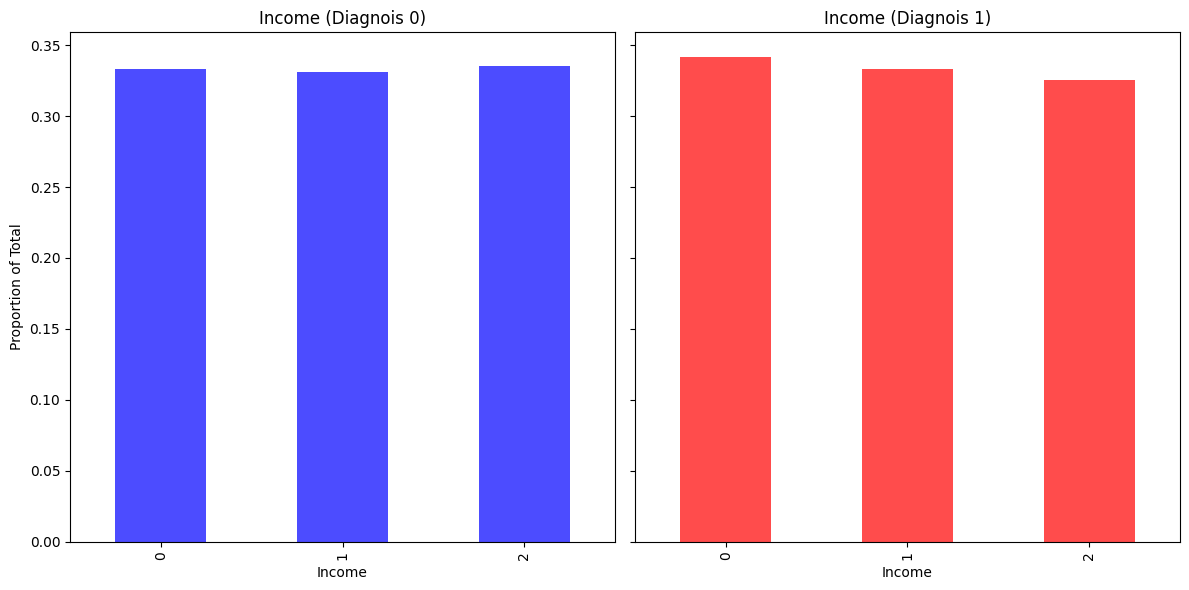

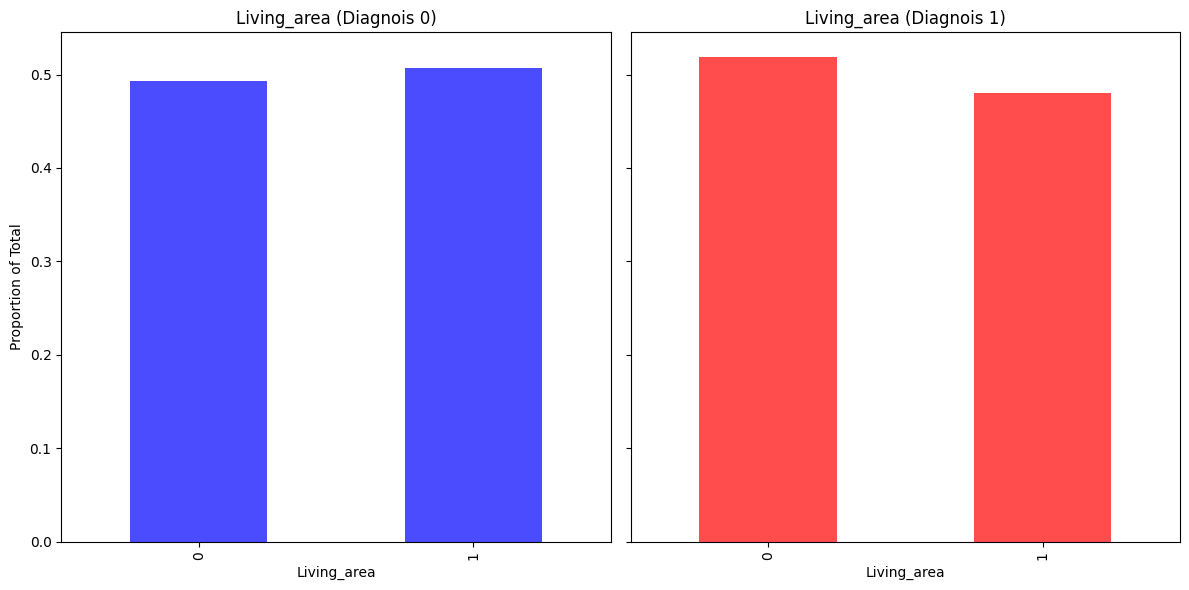

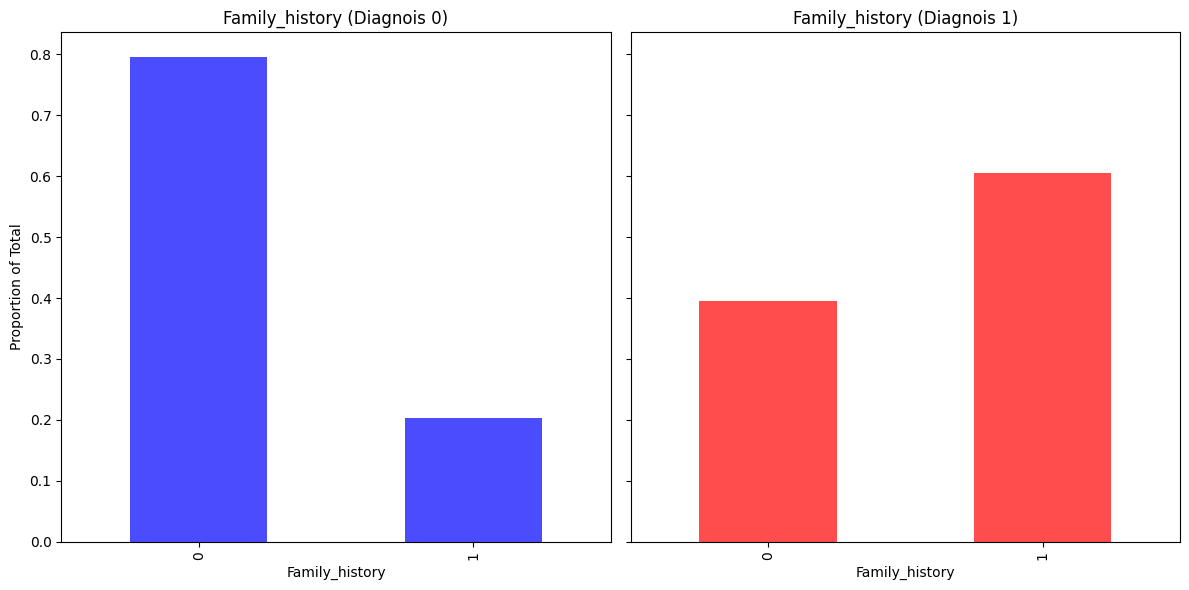

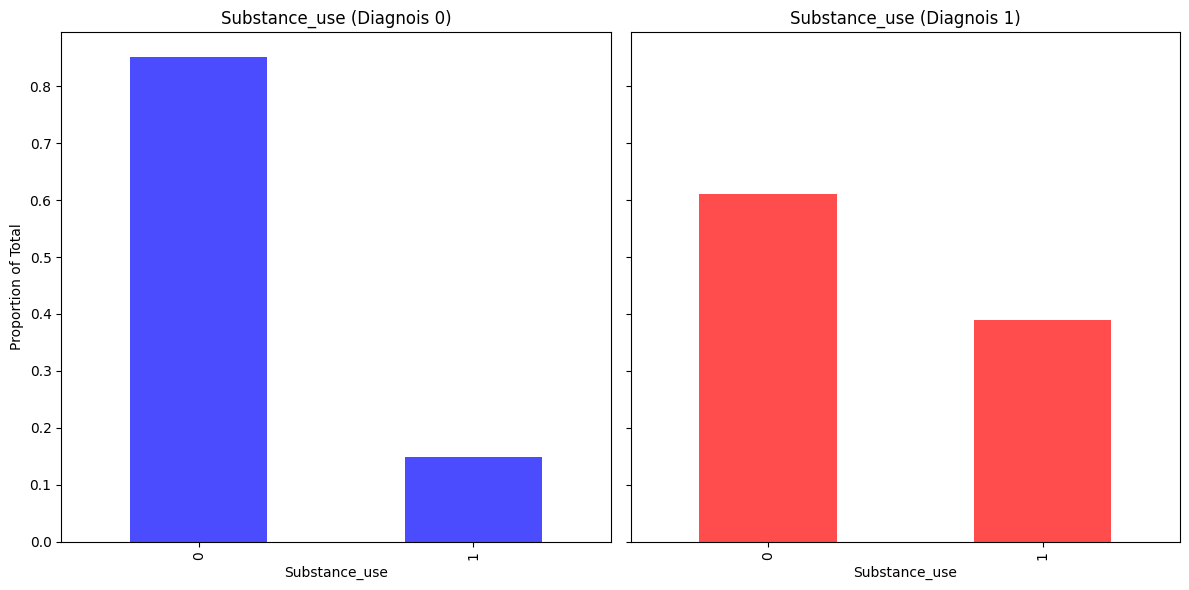

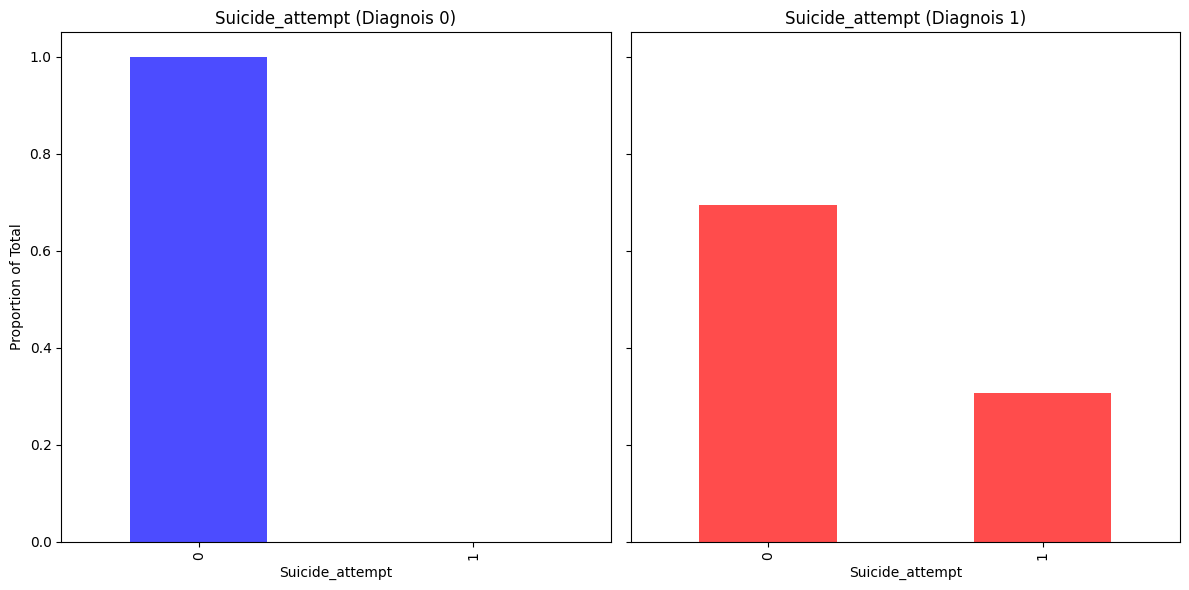

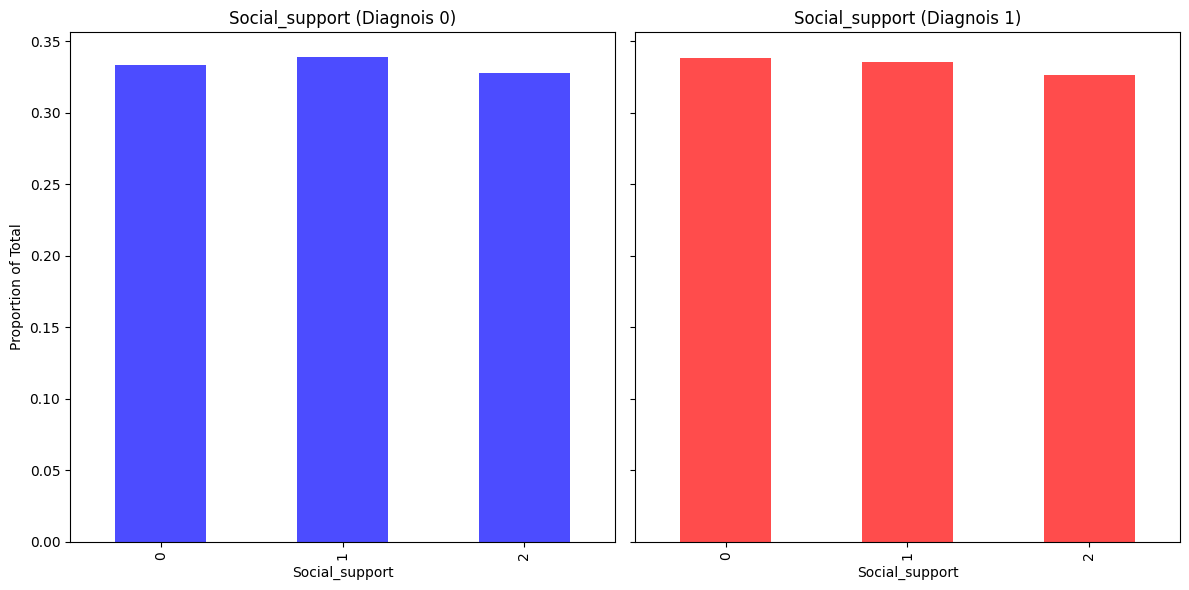

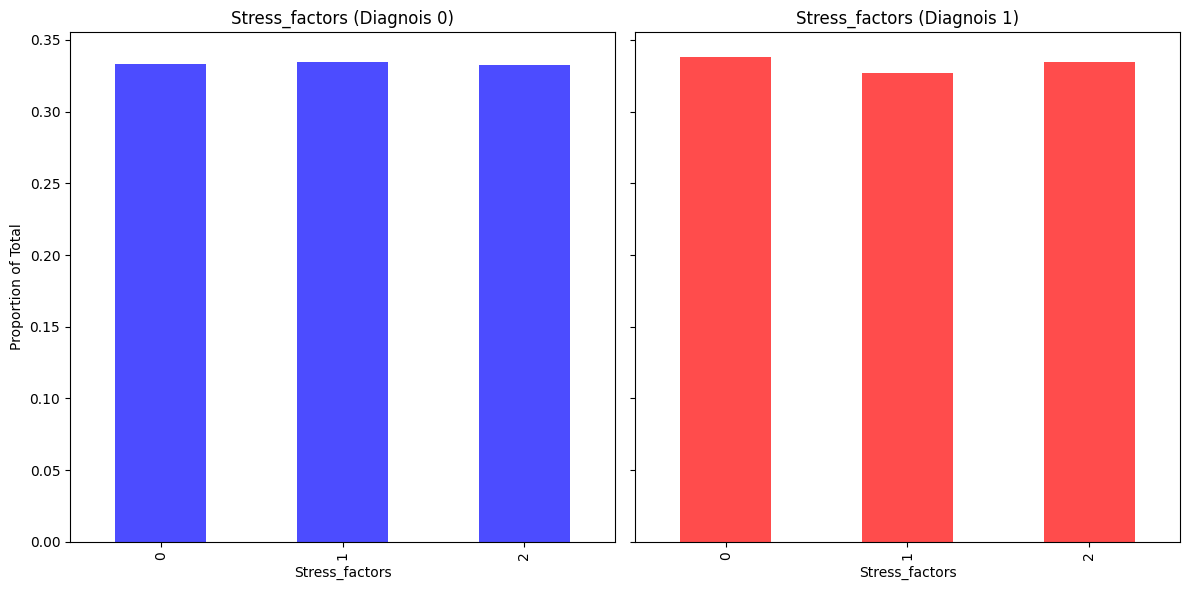

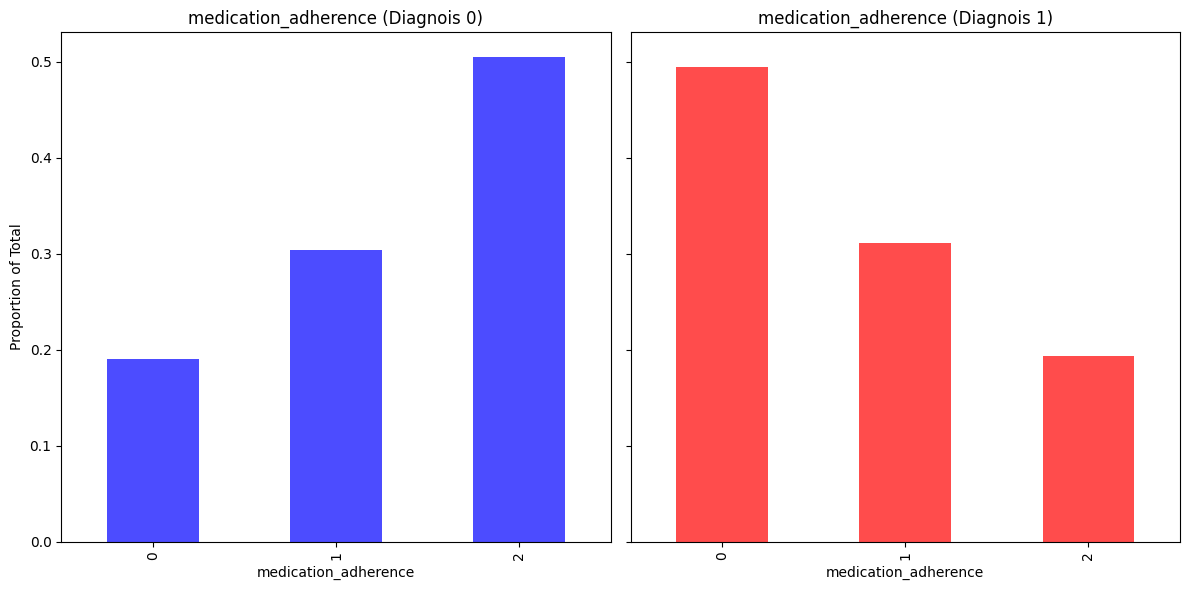

In [24]:
# 범주형 시각화 (bar chart)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 범주형 데이터만 포함하는 DataFrame 생성
df_cat = df[cat_cols]

# 'diagnosis' 컬럼을 기준으로, 범주형 변수의 각 범주가 전체 데이터에서 차지하는 비율을 좌우 막대그래프로 시각화
# (diagnosis가 0인 그룹과 1인 그룹을 각각 좌측과 우측에 배치)
for col in [c for c in df_cat.columns if c != 'Diagnois']:
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    
    for i, diag in enumerate([0, 1]):
        # 해당 그룹의 데이터 추출
        group_data = df_cat[df_cat['Diagnois'] == diag][col]
        # 범주별 빈도를 전체 DataFrame의 행 수로 나누어 전체 대비 비율 계산
        prop = group_data.value_counts() / len(group_data)
        
        # 그룹별 색상 지정 (예: 0은 파란색, 1은 빨간색)
        color = 'blue' if diag == 0 else 'red'
        
        # 막대그래프 그리기
        prop.sort_index().plot(kind='bar', ax=axes[i], color=color, alpha=0.7)
        axes[i].set_title(f'{col} (Diagnois {diag})')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Proportion of Total')
    
    plt.tight_layout()
    plt.show()

- occupation에서 미세한 차이 (employed집단이 가장 큰 비율 차지)
- income이 늘어날수록 미세하게 발병률이 낮아짐
- urban 지역이 더 큰 비율 차지 (소득수준?)
- family history가 강한 factor
- substance_use 유의미한 gap
- medication_adherence는 거의 반대 양상임

# Task3. 분석 목적 및 인사이트

- 제1 목적: 진단이 어려운 정신질환의 효율적 관리
- 제2 목적: 조현병의 주요 factor 발견 및 관리